# Bài tập 1

In [29]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.3MB/s]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    array = np.array([1] * len(features_X))
    features_X = np.column_stack((array, features_X))

    return features_X, sales_Y


In [31]:
features_X , _ = load_data_from_file ()
print ( features_X [:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [32]:
_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

(200,)


# Bài tập 2

In [33]:
def create_individual(n=4, bound=10):
    individual = []

    for i in range(n):
        individual.append(random.uniform(-bound/2, bound/2))

    return individual

individual = create_individual()
print(individual)

#sample result: [[4.097462559682401, 4.827854760376531, 3.1021723599658957, 4.021659504395827]]


[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


# Bài tập 3

In [34]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0

    fitness_value = 1/(loss+1)

    return fitness_value


In [35]:
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


# Bài tập 4

In [36]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new


In [37]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


# Bài tập 5

In [38]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = random.uniform(-5, 5)

    return individual_m


In [39]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


# Bài tập 6

In [40]:
def initializePopulation ( m ) :
  population = [ create_individual () for _ in range ( m ) ]
  return population

# Bài tập 7

In [41]:
def selection ( sorted_old_population , m = 100) :
  index1 = random . randint (0 , m -1)
  while True :
    index2 = random . randint (0 , m -1)
    if ( index2 != index1 ) :
      break
  individual_s = sorted_old_population [ index1 ]
  if index2 > index1 :
    individual_s = sorted_old_population [ index2 ]
  return individual_s

# Bài tập 8

In [42]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])

    new_population = []

    while len(new_population) < m - elitism:
        # Selection: Chọn ngẫu nhiên hai cá thể từ nửa trên của quần thể đã sắp xếp
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # Crossover: Lai ghép hai cá thể cha mẹ
        child1, child2 = crossover(parent1, parent2, crossover_rate=0.9)

        # Mutation: Thực hiện đột biến với tỷ lệ đã định
        child1 = mutate(child1, mutation_rate=0.05)
        child2 = mutate(child2, mutation_rate=0.05)

        # Thêm các cá thể mới vào quần thể mới
        new_population.append(child1)
        if len(new_population) < m - elitism:
            new_population.append(child2)

    # Copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])


In [43]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


# Bài tập 9

In [44]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []

    for i in range(n_generations):
        # Tạo quần thể mới từ quần thể hiện tại
        population, best_loss = create_new_population(population, elitism=2, gen=i)

        # Lưu lại giá trị loss tốt nhất trong từng thế hệ
        losses_list.append(best_loss)

        # In ra thông tin về thế hệ hiện tại
        print(f"Generation {i + 1}/{n_generations}, Best Loss: {best_loss}")

    return losses_list, population

# Giả sử bạn đã có các hàm sau:
# - initializePopulation(m): Khởi tạo quần thể với `m` cá thể.
# - create_new_population(old_population, elitism, gen): Tạo ra quần thể mới từ quần thể cũ với số lượng elitism được giữ lại.


# Bài tập 10

Best loss: 719.2973417768828 with chromosome: [-0.6911151751419382, 0.2913327458354118, -0.0583980685263219, -0.8152295489450969]
Generation 1/100, Best Loss: 719.2973417768828
Best loss: 551.4722379896647 with chromosome: [-4.1342995000469465, 0.2175851555141195, -0.7534756619023657, -0.23768078243620216]
Generation 2/100, Best Loss: 551.4722379896647
Best loss: 551.4722379896647 with chromosome: [-4.1342995000469465, 0.2175851555141195, -0.7534756619023657, -0.23768078243620216]
Generation 3/100, Best Loss: 551.4722379896647
Best loss: 551.4722379896647 with chromosome: [-4.1342995000469465, 0.2175851555141195, -0.7534756619023657, -0.23768078243620216]
Generation 4/100, Best Loss: 551.4722379896647
Best loss: 83.3219611939711 with chromosome: [2.629057760183615, 0.08683878838675341, 0.5558803130875623, -0.2923167070131214]
Generation 5/100, Best Loss: 83.3219611939711
Best loss: 71.52738797977604 with chromosome: [0.8951484720613658, 0.08683878838675341, 0.5558803130875623, -0.29231

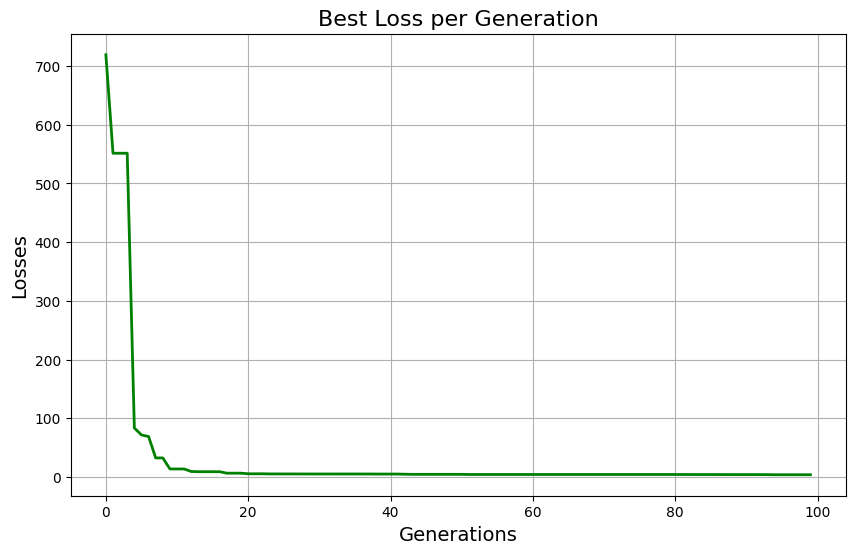

In [46]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    # Vẽ biểu đồ giá trị loss tốt nhất qua các thế hệ
    plt.figure(figsize=(10, 6))
    plt.plot(losses_list, color='g', linestyle='-', linewidth=2)
    plt.xlabel('Generations', fontsize=14)
    plt.ylabel('Losses', fontsize=14)
    plt.title('Best Loss per Generation', fontsize=16)
    plt.grid(True)
    plt.show()

# Giả sử đã có danh sách losses_list từ hàm run_GA()
losses_list, _ = run_GA()
visualize_loss(losses_list)


# Bài tập 11

Best loss: 1876.742850136191 with chromosome: [-0.06176959558359041, -0.15491709874299708, 2.93663757834178, -0.7273876186411048]
Generation 1/100, Best Loss: 1876.742850136191
Best loss: 1876.742850136191 with chromosome: [-0.06176959558359041, -0.15491709874299708, 2.93663757834178, -0.7273876186411048]
Generation 2/100, Best Loss: 1876.742850136191
Best loss: 1640.2966491141262 with chromosome: [-2.5388054370402733, -0.09578647478067381, -1.3573811919083365, 1.835080717849367]
Generation 3/100, Best Loss: 1640.2966491141262
Best loss: 1031.0339022496808 with chromosome: [-0.3558829809830186, 0.05447391072360119, -1.1367166955285746, 0.22650302011670842]
Generation 4/100, Best Loss: 1031.0339022496808
Best loss: 693.7262701438414 with chromosome: [2.0512497023035783, -0.01809538800707955, 0.923210491189586, 0.4287205104661096]
Generation 5/100, Best Loss: 693.7262701438414
Best loss: 256.9343430957782 with chromosome: [-1.4369186113514374, 0.035543925081043426, 1.1080519714452564, -0

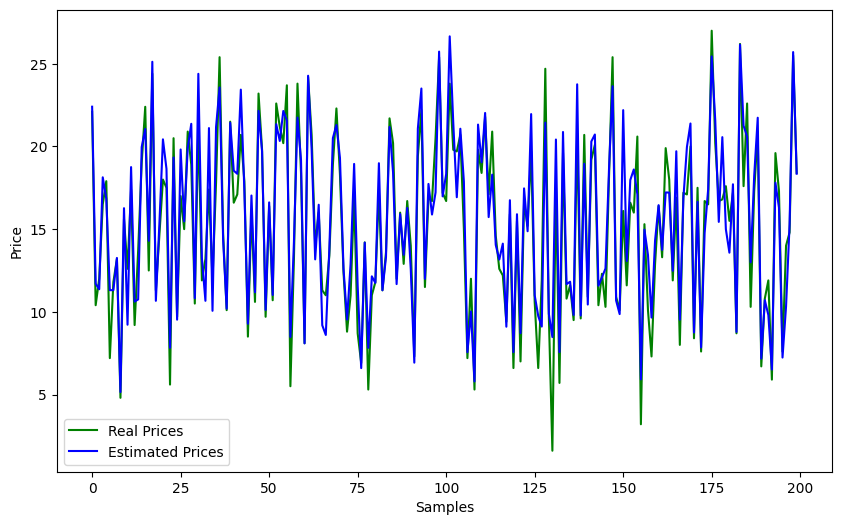

In [47]:
def visualize_predict_gt(population):
    # Visualization of ground truth and predicted values
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])  # Hiển thị cá thể tốt nhất trong quần thể
    theta = np.array(sorted_population[-1])  # Trích xuất giá trị theta từ cá thể tốt nhất

    estimated_prices = []
    for feature in features_X:
        # Tính giá trị dự đoán cho mỗi feature vector
        estimated_price = np.dot(feature, theta)  # Sử dụng dot product giữa feature và theta
        estimated_prices.append(estimated_price)

    # Tạo biểu đồ để so sánh giá trị thực tế và giá trị dự đoán
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

# Giả sử đã có các biến cần thiết như population, features_X, và sales_Y từ các hàm trước đó
_, population = run_GA()
visualize_predict_gt(population)
